In [75]:
# !pip install --upgrade pip

In [76]:
# !pip install yfinance

In [77]:
# import libraries

import numpy as np 
import pandas as pd
import yfinance as yf

from sklearn.preprocessing import StandardScaler # use it because kmean is sentsitive for the wide range of features, then we apply it for normalization

import matplotlib.pyplot as plt 
%matplotlib inline

In [78]:
start = "2010-01-01"
end = "2023-12-31"

In [79]:
pttbk_df = yf.download("PTT.BK", start = start, end = end, progress = False) # raw data
pttbk_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,24.600000,24.700001,24.100000,24.5,13.929267,40044000
2010-01-05,24.799999,25.000000,24.299999,24.4,13.872414,69048000
2010-01-06,24.500000,24.600000,24.299999,24.5,13.929267,29298000
2010-01-07,24.700001,24.799999,24.400000,24.4,13.872414,48300000
2010-01-08,24.400000,24.799999,24.400000,24.6,13.986125,41024000


In [80]:
pttbk_df.shape

(3410, 6)

In [81]:
pttbk_df.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-25', '2023-12-26',
               '2023-12-27', '2023-12-28'],
              dtype='datetime64[ns]', name='Date', length=3410, freq=None)

In [82]:
type(pttbk_df)

pandas.core.frame.DataFrame

In [83]:
stock = pttbk_df.copy()
stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,24.600000,24.700001,24.100000,24.5,13.929267,40044000
2010-01-05,24.799999,25.000000,24.299999,24.4,13.872414,69048000
2010-01-06,24.500000,24.600000,24.299999,24.5,13.929267,29298000
2010-01-07,24.700001,24.799999,24.400000,24.4,13.872414,48300000
2010-01-08,24.400000,24.799999,24.400000,24.6,13.986125,41024000


In [84]:
stock.shape

(3410, 6)

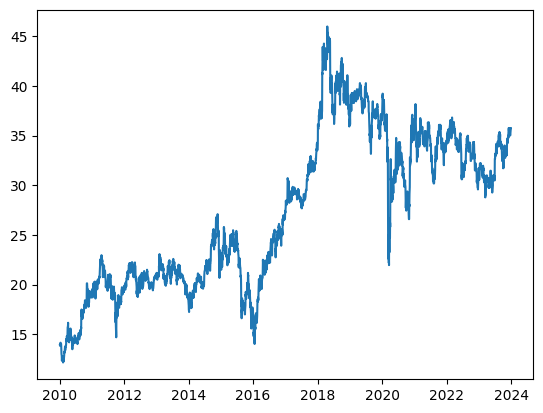

In [85]:
# plot 

plt.plot(stock['Adj Close'])

In [86]:
# get feature for clustering

# calculate log return
stock['Log Rets'] = np.log(stock['Adj Close'] / stock['Adj Close'].shift(1))
stock.head()

,Open,High,Low,Close,Adj Close,Volume,Log Rets
Date,,,,,,,
2010-01-04,24.600000,24.700001,24.100000,24.5,13.929267,40044000,NaN
2010-01-05,24.799999,25.000000,24.299999,24.4,13.872414,69048000,-0.004090
2010-01-06,24.500000,24.600000,24.299999,24.5,13.929267,29298000,0.004090
2010-01-07,24.700001,24.799999,24.400000,24.4,13.872414,48300000,-0.004090
2010-01-08,24.400000,24.799999,24.400000,24.6,13.986125,41024000,0.008164


In [87]:
stock.shape

(3410, 7)

In [88]:
stock.dropna(inplace = True)

In [89]:
stock.head()

,Open,High,Low,Close,Adj Close,Volume,Log Rets
Date,,,,,,,
2010-01-05,24.799999,25.000000,24.299999,24.4,13.872414,69048000,-0.004090
2010-01-06,24.500000,24.600000,24.299999,24.5,13.929267,29298000,0.004090
2010-01-07,24.700001,24.799999,24.400000,24.4,13.872414,48300000,-0.004090
2010-01-08,24.400000,24.799999,24.400000,24.6,13.986125,41024000,0.008164
2010-01-11,24.799999,25.100000,24.799999,24.9,14.156686,63098000,0.012121


In [90]:
stock.shape

(3409, 7)

In [91]:
# prepare features to be used for clustering

stock['Rets Mean'] = stock['Log Rets'].rolling(5).mean() # calculate mean eavery 5 days
stock.head()

,Open,High,Low,Close,Adj Close,Volume,Log Rets,Rets Mean
Date,,,,,,,,
2010-01-05,24.799999,25.000000,24.299999,24.4,13.872414,69048000,-0.004090,NaN
2010-01-06,24.500000,24.600000,24.299999,24.5,13.929267,29298000,0.004090,NaN
2010-01-07,24.700001,24.799999,24.400000,24.4,13.872414,48300000,-0.004090,NaN
2010-01-08,24.400000,24.799999,24.400000,24.6,13.986125,41024000,0.008164,NaN
2010-01-11,24.799999,25.100000,24.799999,24.9,14.156686,63098000,0.012121,0.003239


In [92]:
stock['Rets STD'] = stock['Log Rets'].rolling(5).std() # calculate mean eavery 5 days
stock.head()

,Open,High,Low,Close,Adj Close,Volume,Log Rets,Rets Mean,Rets STD
Date,,,,,,,,,
2010-01-05,24.799999,25.000000,24.299999,24.4,13.872414,69048000,-0.004090,NaN,NaN
2010-01-06,24.500000,24.600000,24.299999,24.5,13.929267,29298000,0.004090,NaN,NaN
2010-01-07,24.700001,24.799999,24.400000,24.4,13.872414,48300000,-0.004090,NaN,NaN
2010-01-08,24.400000,24.799999,24.400000,24.6,13.986125,41024000,0.008164,NaN,NaN
2010-01-11,24.799999,25.100000,24.799999,24.9,14.156686,63098000,0.012121,0.003239,0.007268


In [93]:
stock.dropna(inplace = True)
stock.head()

# or we can use
# stock = stock.dropna()

,Open,High,Low,Close,Adj Close,Volume,Log Rets,Rets Mean,Rets STD
Date,,,,,,,,,
2010-01-11,24.799999,25.100000,24.799999,24.900000,14.156686,63098000,0.012121,0.003239,0.007268
2010-01-12,24.799999,24.900000,24.700001,24.700001,14.042977,36750000,-0.008065,0.002444,0.008399
2010-01-13,24.500000,24.799999,24.400000,24.600000,13.986125,62833000,-0.004057,0.000815,0.008782
2010-01-14,24.799999,24.900000,24.600000,24.700001,14.042977,32838000,0.004057,0.002444,0.008391
2010-01-15,24.799999,24.900000,24.600000,24.700001,14.042977,35461000,0.000000,0.000811,0.007771


In [94]:
stock.shape

(3405, 9)

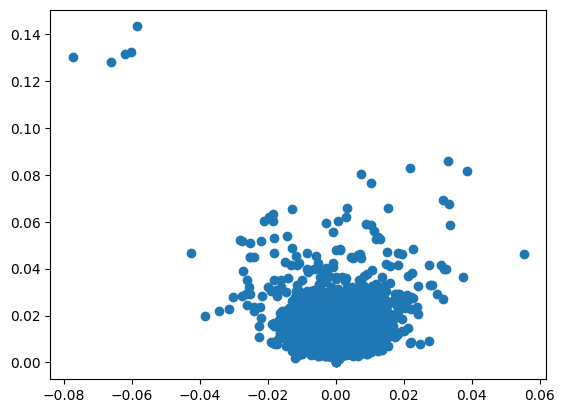

In [95]:
# plot

plt.scatter(stock['Rets Mean'], stock['Rets STD']); # plot X and y

In [96]:
# get array X in order to perform clustering

X1 = stock['Rets Mean']
X1

Date
2010-01-11    3.238970e-03
2010-01-12    2.444040e-03
2010-01-13    8.147210e-04
2010-01-14    2.444040e-03
2010-01-15    8.113341e-04
                  ...     
2023-12-22   -2.816948e-03
2023-12-25   -1.403515e-03
2023-12-26   -3.261280e-17
2023-12-27    2.816948e-03
2023-12-28    4.240442e-03
Name: Rets Mean, Length: 3405, dtype: float64

In [97]:
type(X1)

pandas.core.series.Series

In [98]:
X2 = stock['Rets STD']
X2

Date
2010-01-11    0.007268
2010-01-12    0.008399
2010-01-13    0.008782
2010-01-14    0.008391
2010-01-15    0.007771
                ...   
2023-12-22    0.008063
2023-12-25    0.009217
2023-12-26    0.009986
2023-12-27    0.006341
2023-12-28    0.003871
Name: Rets STD, Length: 3405, dtype: float64

In [99]:
type(X2)

pandas.core.series.Series

In [100]:
X1 = stock['Rets Mean'].values
X1

array([ 3.23896963e-03,  2.44403986e-03,  8.14721019e-04, ...,
       -3.26128013e-17,  2.81694798e-03,  4.24044153e-03])

In [101]:
X2 = stock['Rets STD'].values
X2

array([0.007268  , 0.00839931, 0.00878166, ..., 0.00998609, 0.00634098,
       0.00387114])

In [102]:
type(X1), type(X2)

(numpy.ndarray, numpy.ndarray)

In [103]:
X = np.array(list(zip(X1, X2)))
X

array([[ 3.23896963e-03,  7.26800410e-03],
       [ 2.44403986e-03,  8.39930585e-03],
       [ 8.14721019e-04,  8.78166072e-03],
       ...,
       [-3.26128013e-17,  9.98608746e-03],
       [ 2.81694798e-03,  6.34097575e-03],
       [ 4.24044153e-03,  3.87113692e-03]])

In [104]:
type(X)

numpy.ndarray

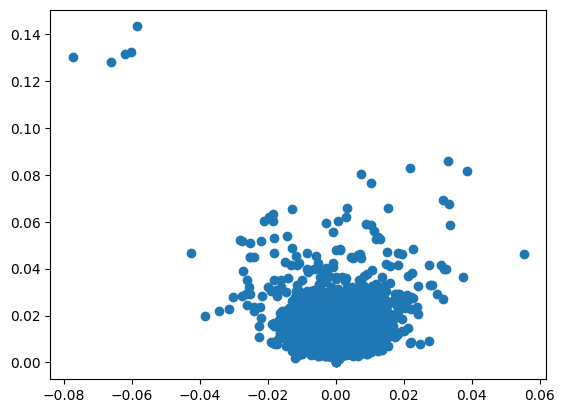

In [105]:
# plot 

plt.scatter(X[:, 0], X[:, 1]); # not need to use stock dataframe

In [106]:
# feature X are not bad but require normalization for kmean - better

def normalizedFeature(x):
    sc = StandardScaler()
    x = sc.fit_transform(x)

    return x


In [107]:
# call a function and keep data in X_norm
X_norm = normalizedFeature(X)
X_norm

array([[ 0.38651969, -0.73168843],
       [ 0.2828274 , -0.617499  ],
       [ 0.07029568, -0.5789055 ],
       ...,
       [-0.03597822, -0.4573351 ],
       [ 0.33147031, -0.82525927],
       [ 0.51715376, -1.07455572]])

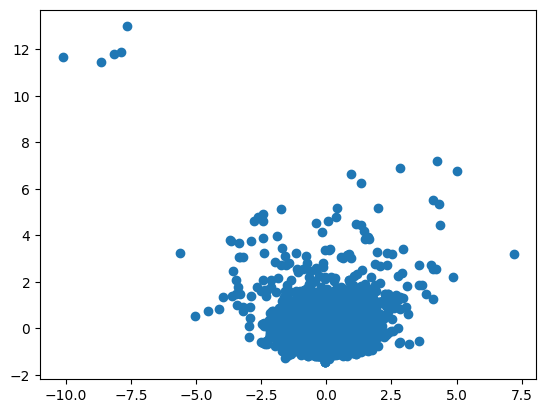

In [108]:
# plot 

plt.scatter(X_norm[:, 0], X_norm[:, 1]);

In [109]:
# start KMean Clustering

# prepare a function for distance between 2 points

def distance_fn(a, b, ax = 1):
    return np.linalg.norm(a-b, axis = ax) # Euclidean distance

In [110]:
def plotCluster(data, C, K, cluster_label):

    colors = ['green', 'blue', 'orange', 'red', 'yellow', 'pink', 'purple', 'salmon']

    plt.figure(figsize = (8, 6))

    for i in range(K):
        points = [] # empty list
        points = np.array([data[j] for j in range(len(data)) if cluster_label[j] == i]) # find data for each cluster
        plt.scatter(points[:, 0], points[:, 1], s = 7, c = colors[i]) # plot
        plt.annotate(i, (C[i, 0], C[i, 1]), size = 20)
        
    plt.scatter(C[:, 0], C[:, 1], marker = '*', color = 'black', s = 200)

    plt.xlabel('Variable #1')
    plt.ylabel('Variable #2')
    plt.title('Cluster')

In [111]:
def kmeanClustering(data, K):

    # step 1. random centroids
    C_x = np.random.randint(np.min(data[:, 0]), np.max(data[:, 0]), size = K)
    C_y = np.random.randint(np.min(data[:, 1]), np.max(data[:, 1]), size = K)

    # set Centroid to variable C
    C = np.zeros((K, 2))
    C_old = np.zeros(C.shape)

    C[:, 0] = C_x 
    C[:, 1] = C_y 

    # Step 2. label data
    cluster_label = np.zeros((len(data), 1))

    for i in range(len(data)): # run 150 rounds - depands on length of data
        distance = distance_fn(data[i, :], C)
        cluster = np.argmin(distance) # for the shortest distance
        cluster_label[i] = cluster

    # Step 3. calculate new centroids
    C_old = C.copy()

    for i in range(K):
        points = [] # empty list
        points = np.array([data[j] for j in range(len(data)) if cluster_label[j] == i])
        C[i] = np.mean(points, axis = 0) # calculate mean and keep in C for each group (i)

    # Calculate error
    error = distance_fn(C, C_old, None)
    
    # Plot
    plotCluster(data, C, K, cluster_label)

    # Check if error is ok to stop
    while error != 0: # will stop when error = 0
    
        cluster_label = np.zeros((len(data), 1))
    
        for i in range(len(data)):
            distance = distance_fn(data[i, :], C)
            cluster = np.argmin(distance)
            cluster_label[i] = cluster
    
        C_old = C.copy()
    
        for i in range(K):
            points = []
            points = np.array([data[j] for j in range(len(data)) if cluster_label[j] == i])
            C[i] = np.mean(points, axis=0)
        
        plotCluster(data, C, K, cluster_label.copy())
    
        error = distance_fn(C, C_old, None)
        print(error)

    return cluster_label

0.3422049453127397
0.1779425385508787
0.10193961054696617
0.06668796396198985
0.048373721277110156
0.040600408205973396
0.041695163331088594
0.037529782648884444
0.03417247723401984
0.04238841234563437
0.03349171950335152
0.04544921298089871
0.03519738002766195
0.044774965665484466
0.05203922774727414
0.06448511573604422
0.04514233134552842
0.028210592602907206
0.09873667181845872


/var/folders/0z/2gy2pkss67v3rwygb64_tfvm0000gn/T/ipykernel_89255/3225941393.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = (8, 6))


0.07670924576860559
0.07383754926972143
0.07095228071545759
0.05945117338674965
0.06358109357778839
0.0675674347798338
0.058499854101544534
0.05624363144797555
0.04660406051557652
0.03265831284401569
0.023120566629871442
0.02347575798994149
0.019752081529756608
0.013720192585005566
0.020790421511545292
0.025380132717574395
0.029155791119561163
0.04761910768395627
0.03682500135890547
0.03048080004883861
0.030301670070219472
0.031387655453595883
0.012622940427771937
0.007642796419497146
0.0030791072957964227
0.0


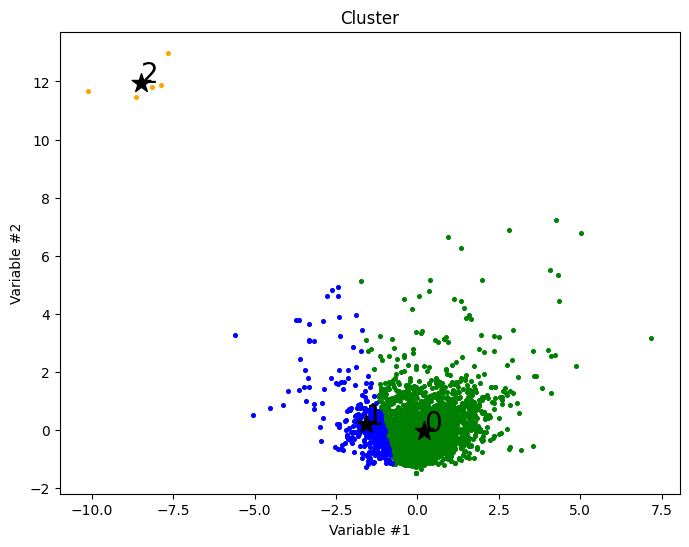

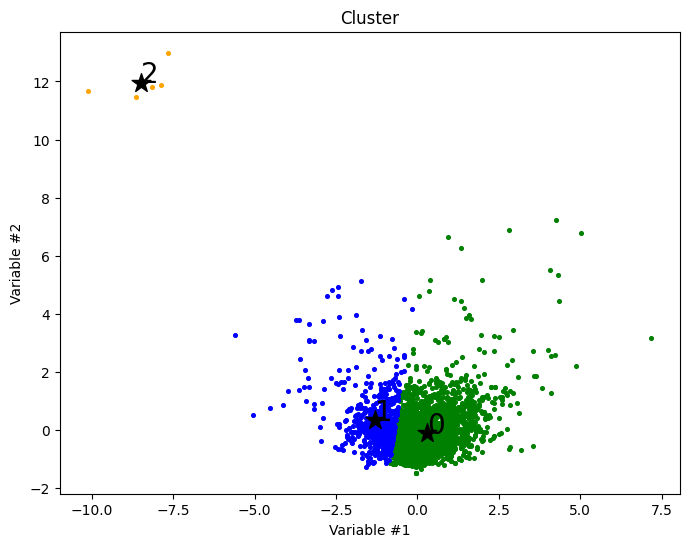

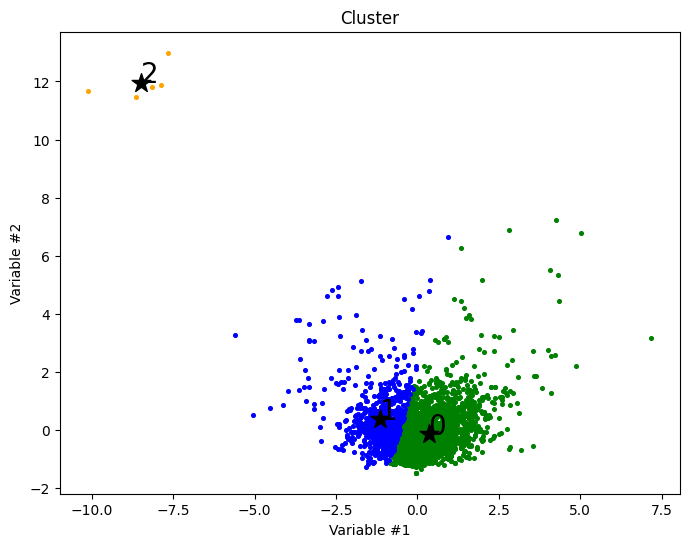

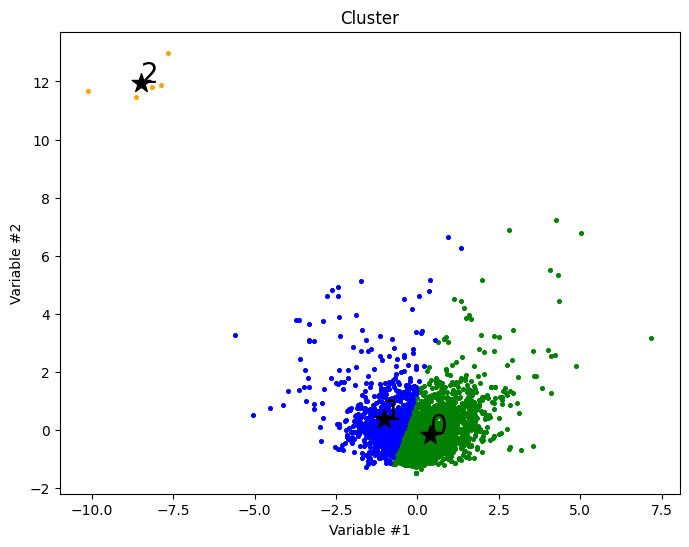

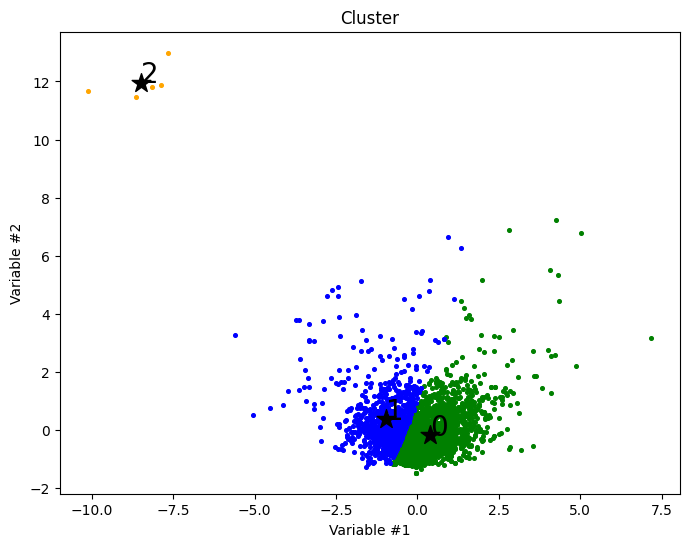

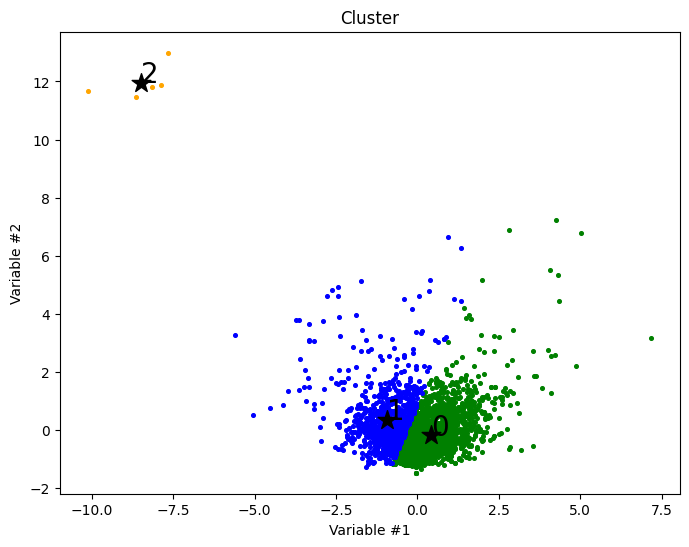

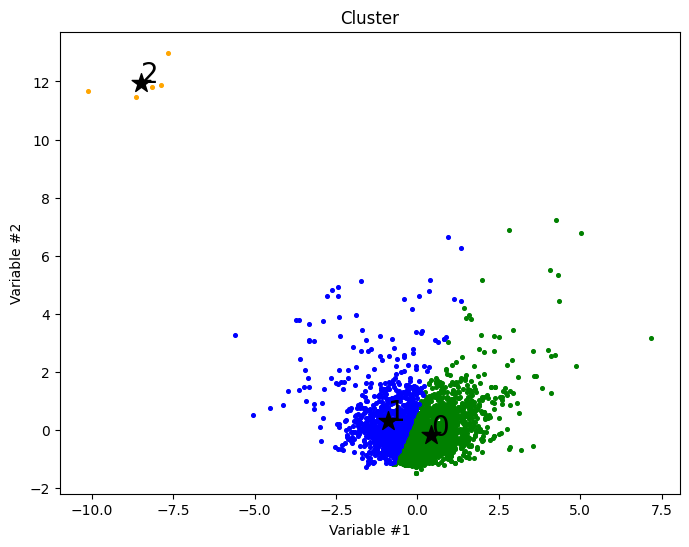

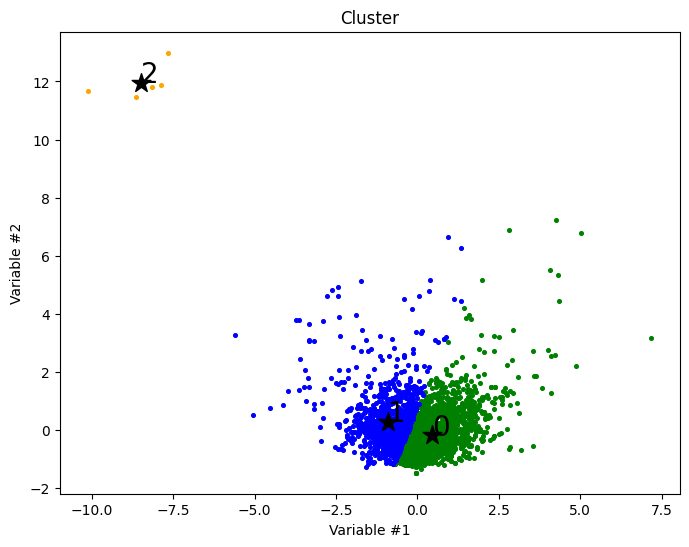

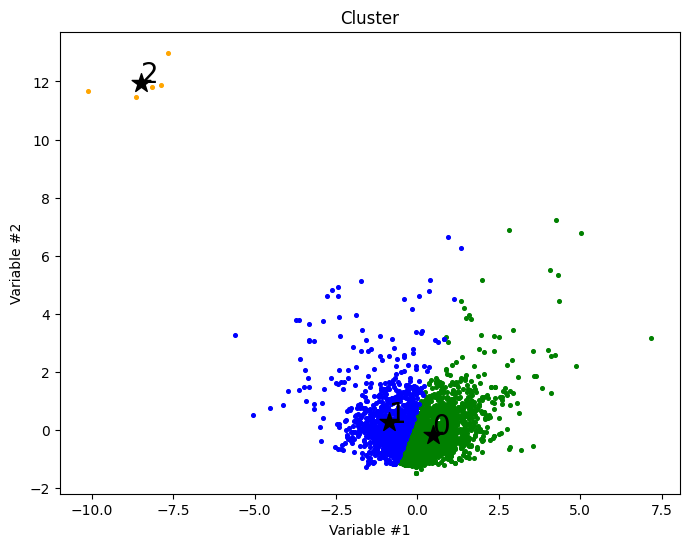

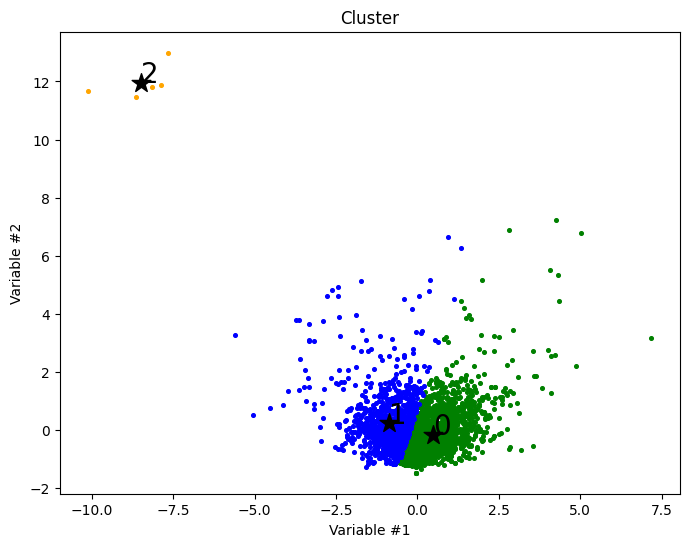

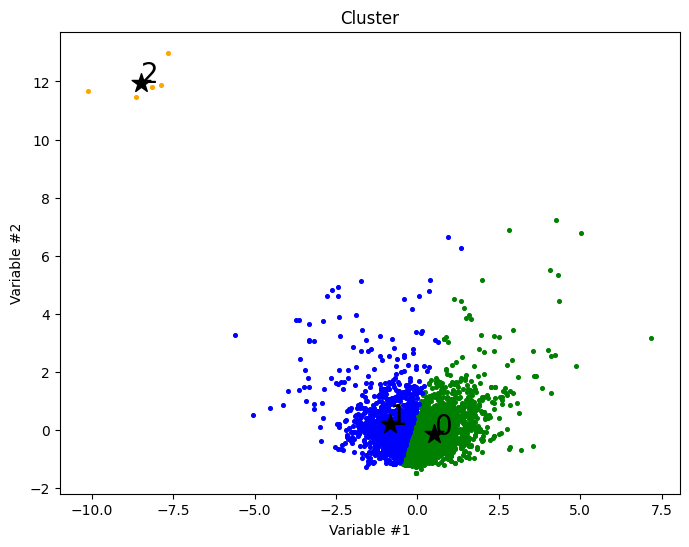

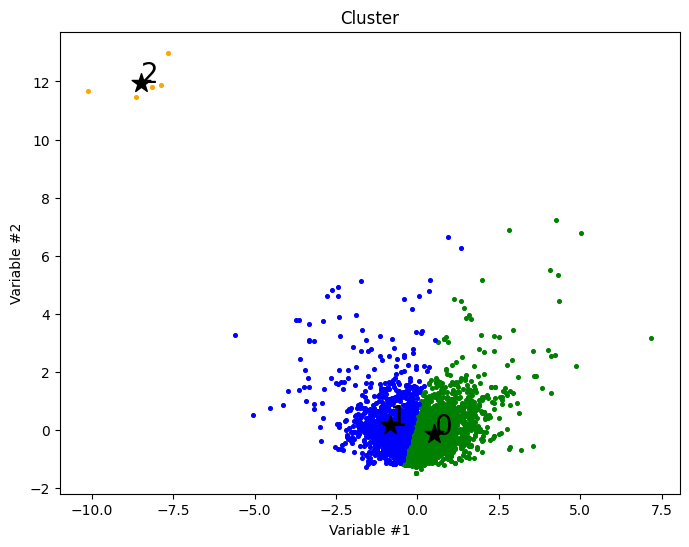

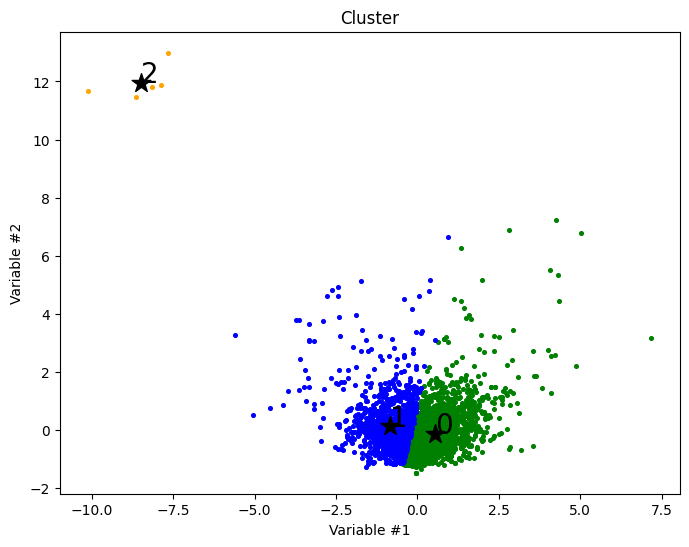

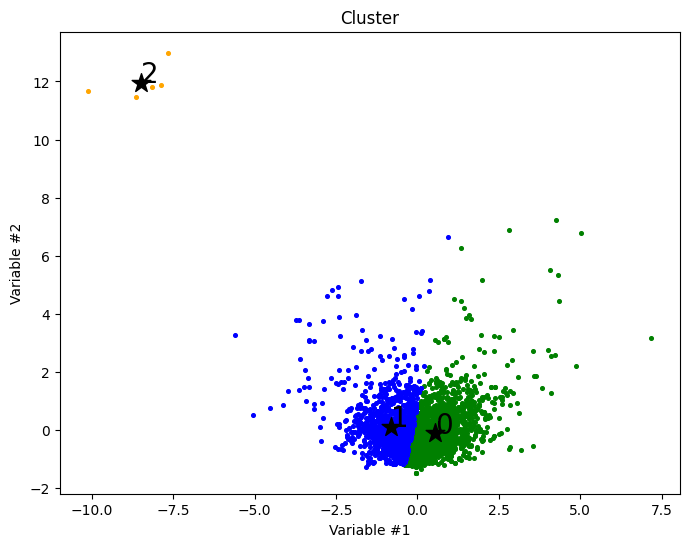

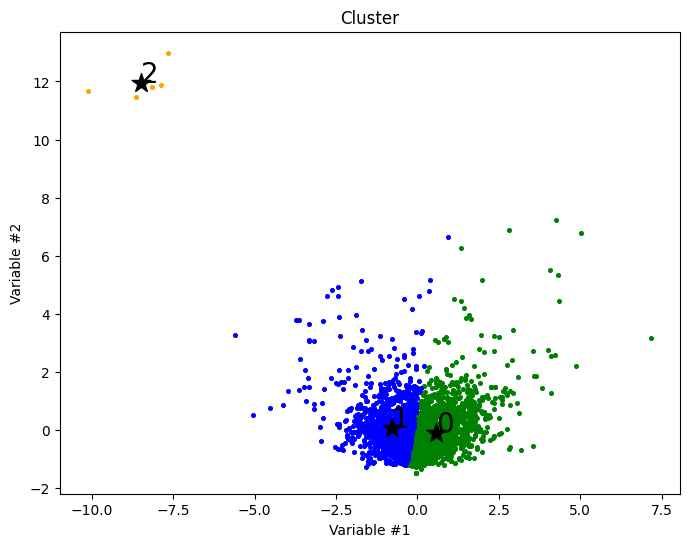

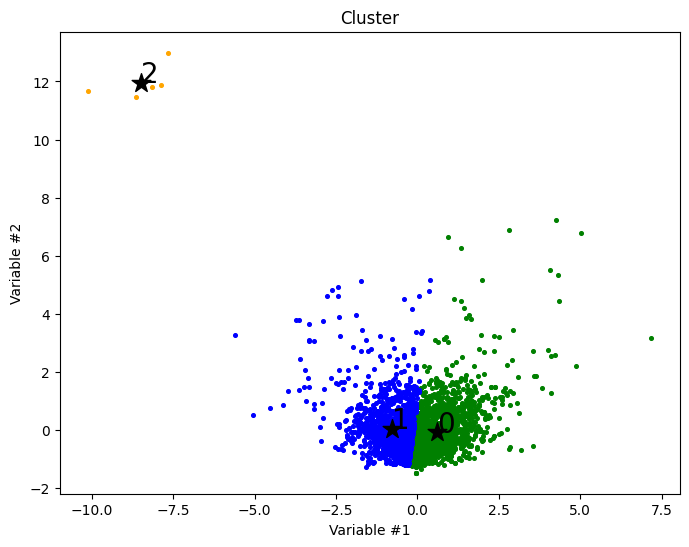

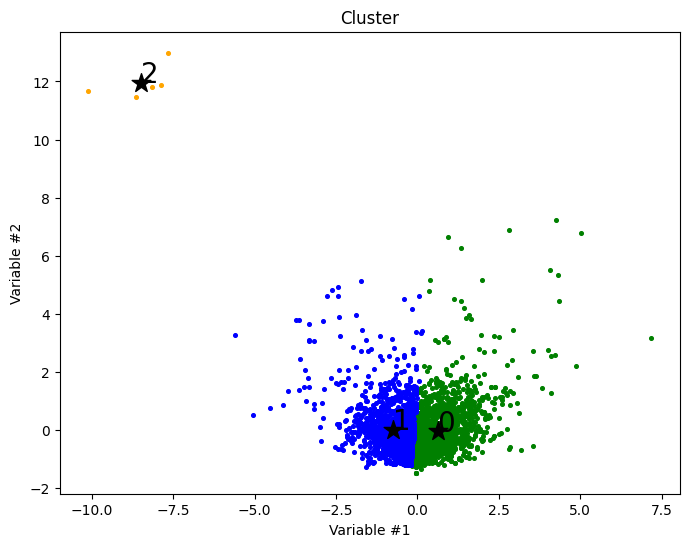

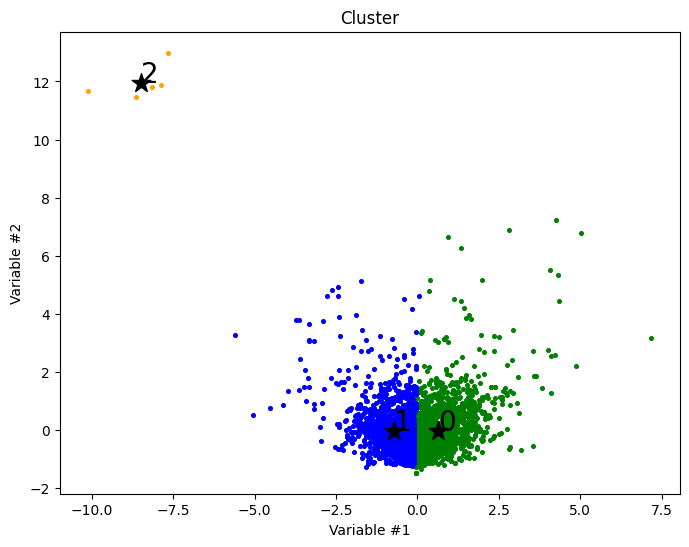

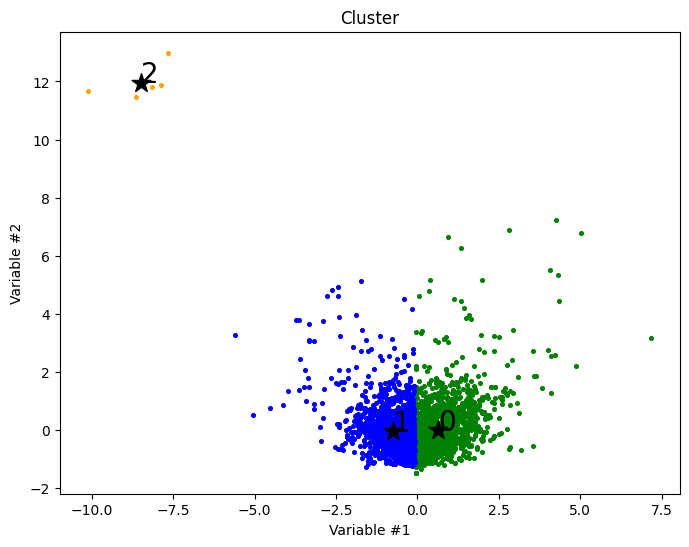

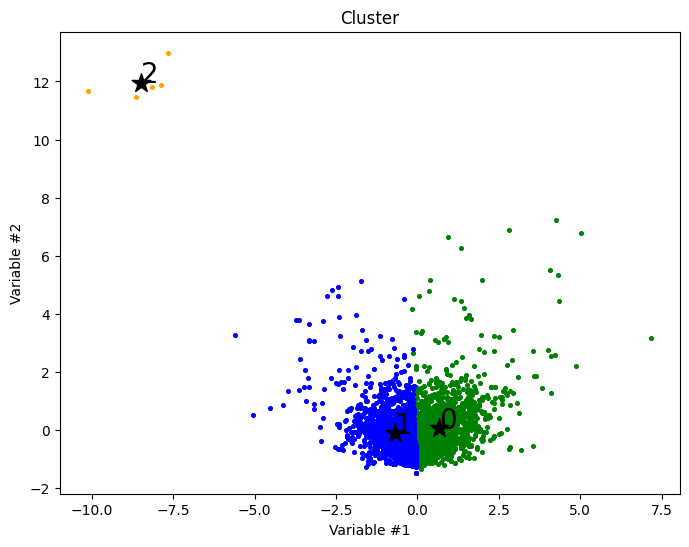

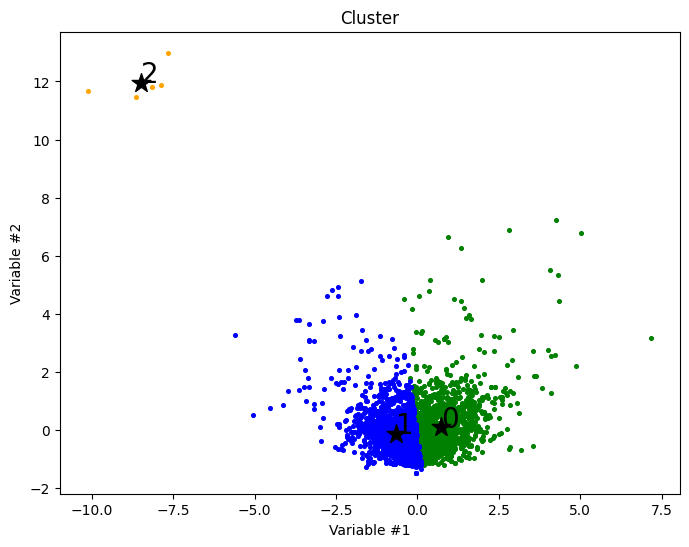

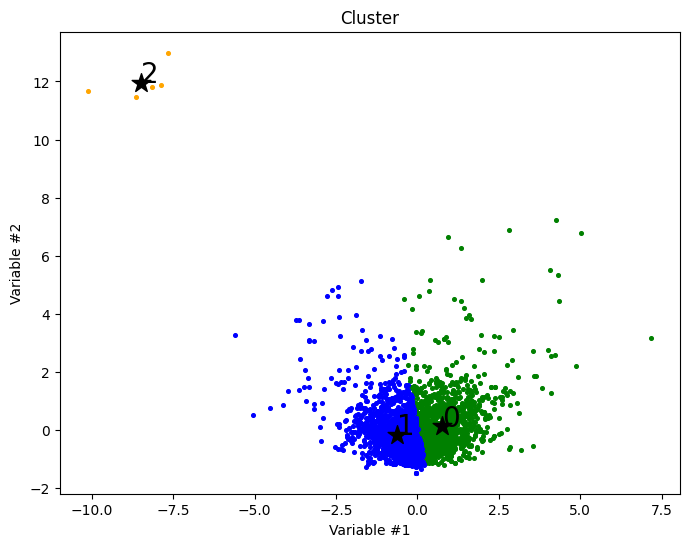

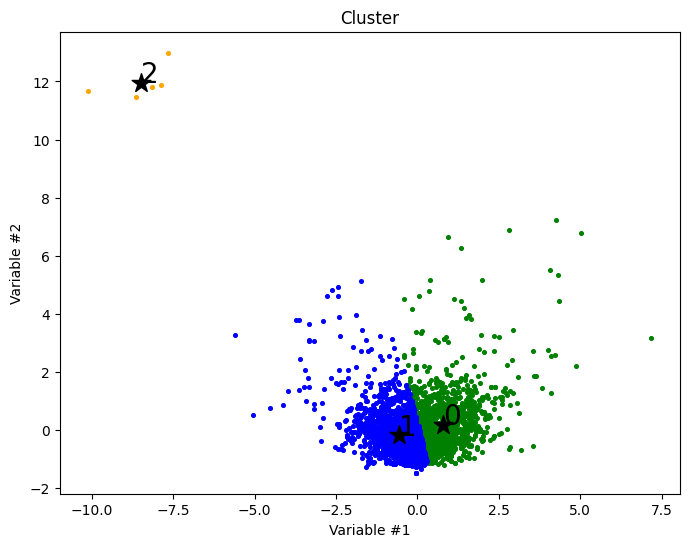

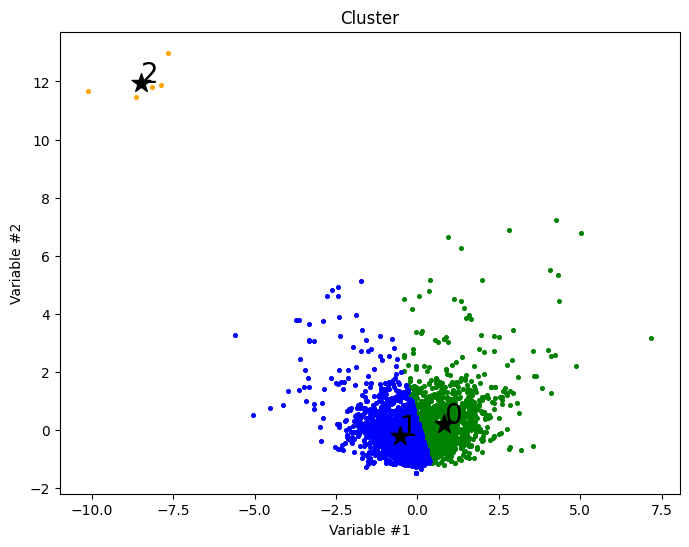

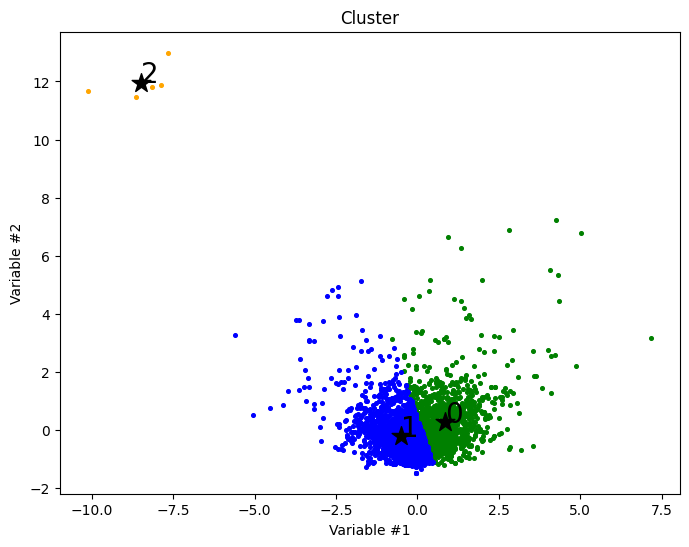

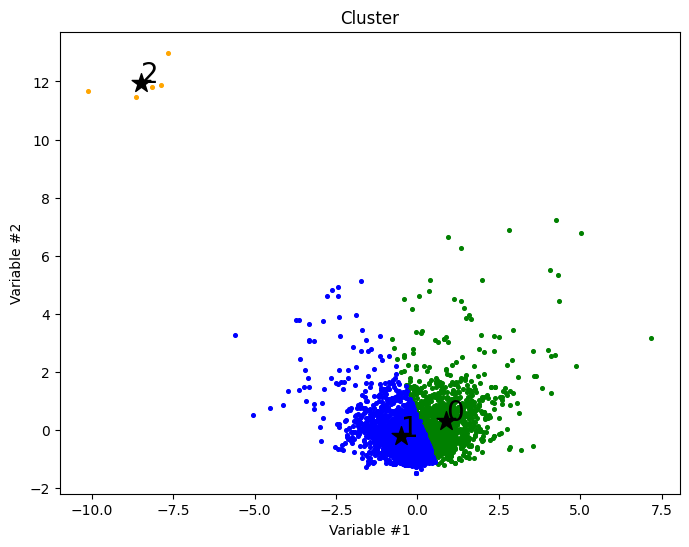

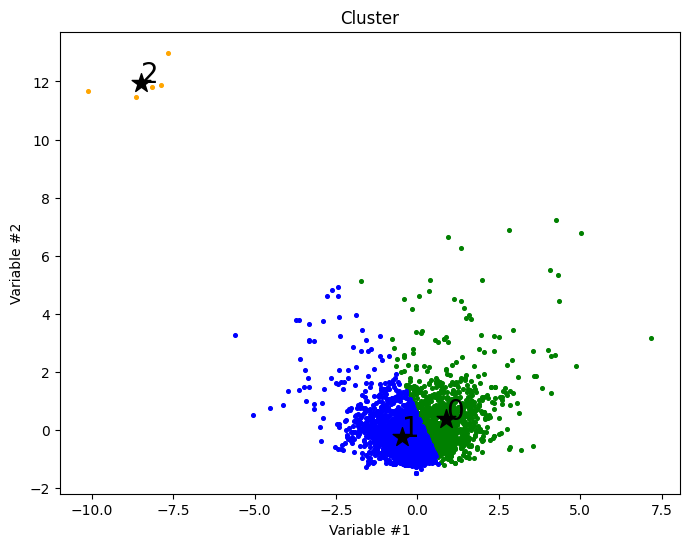

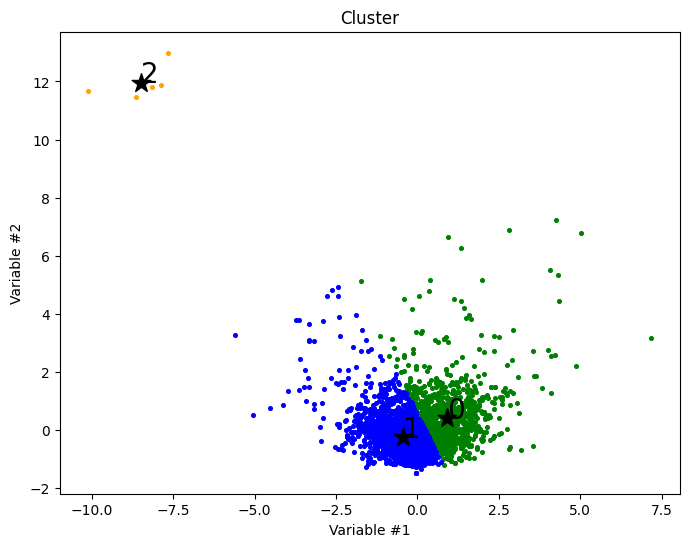

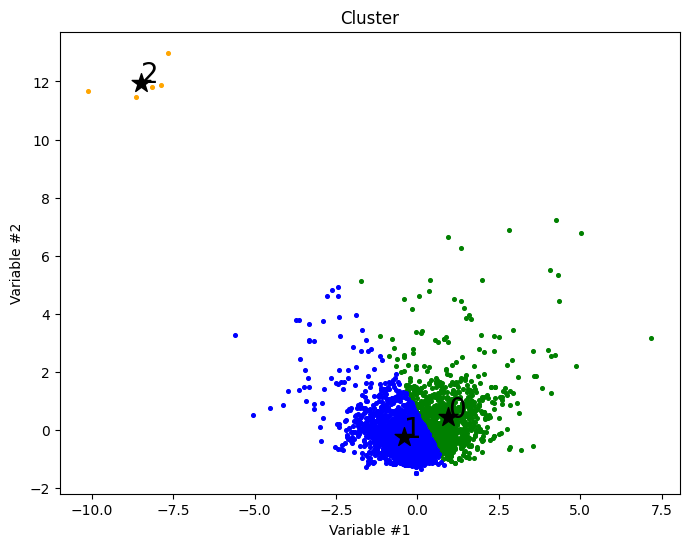

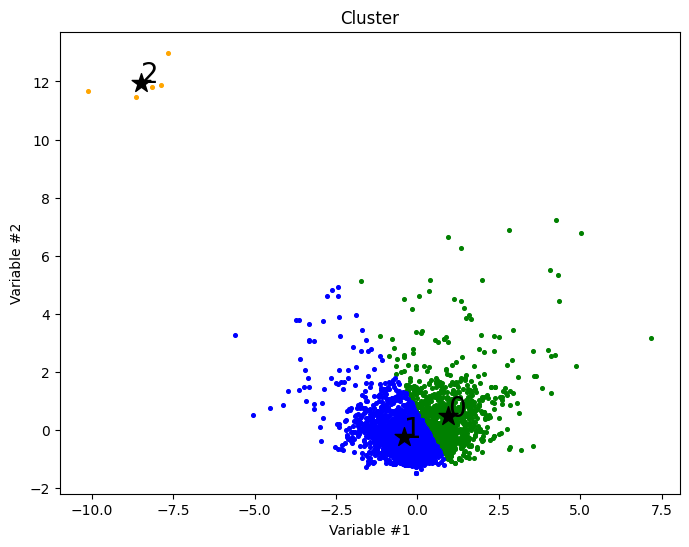

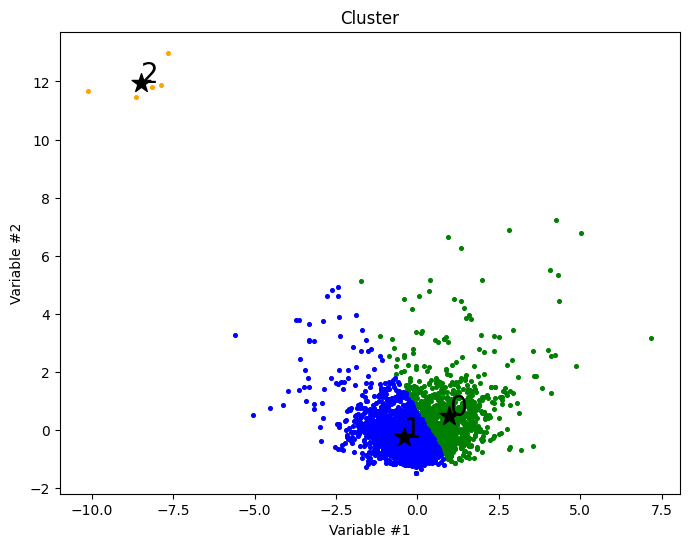

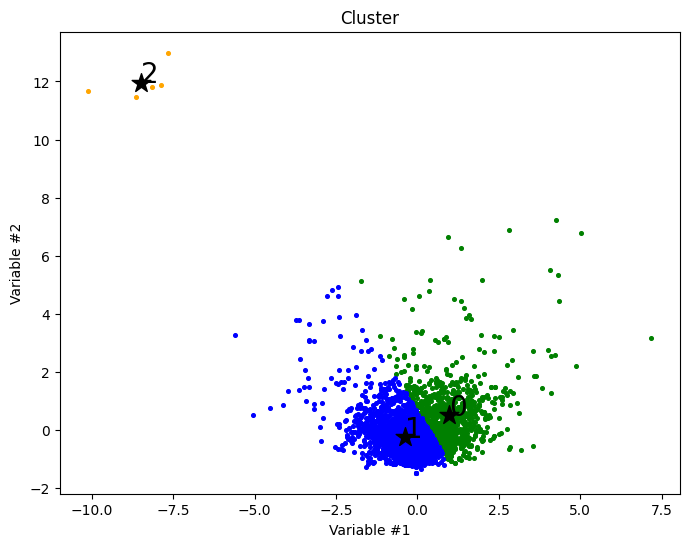

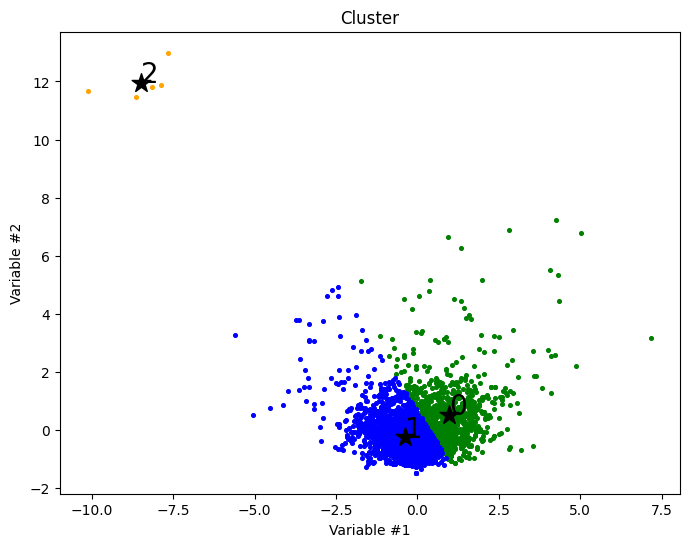

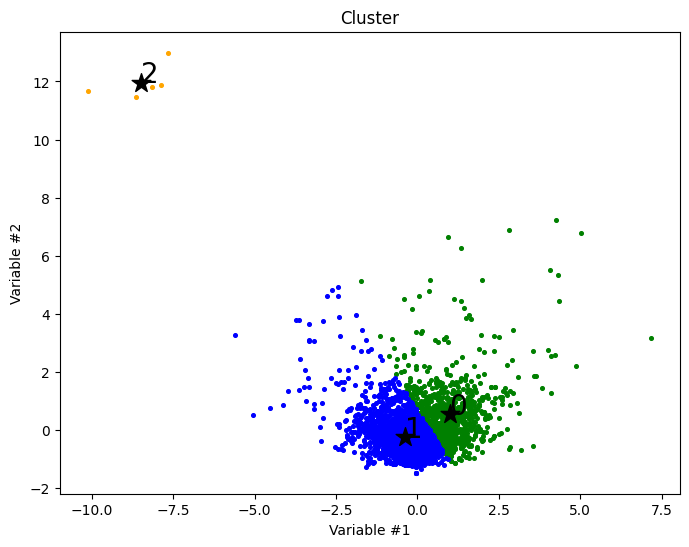

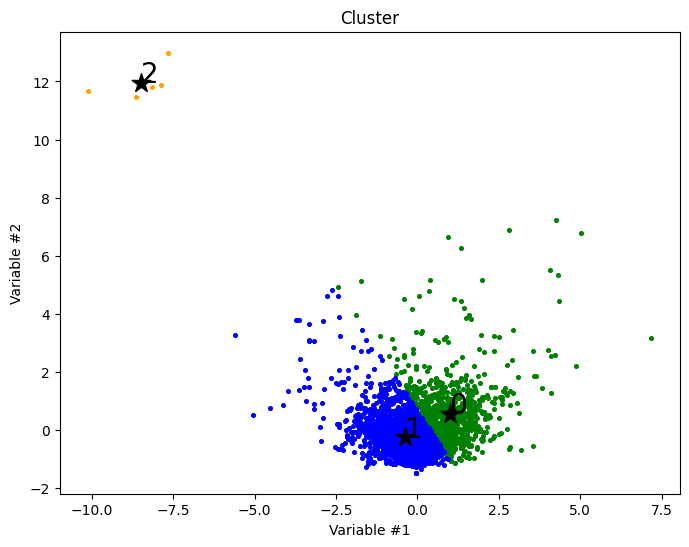

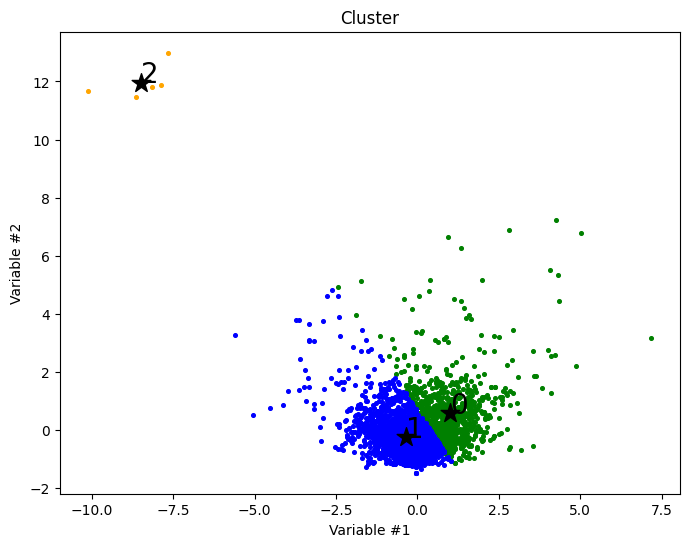

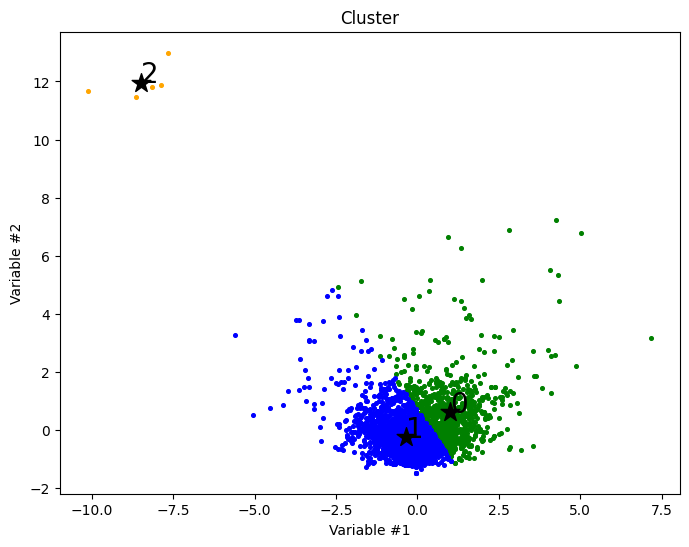

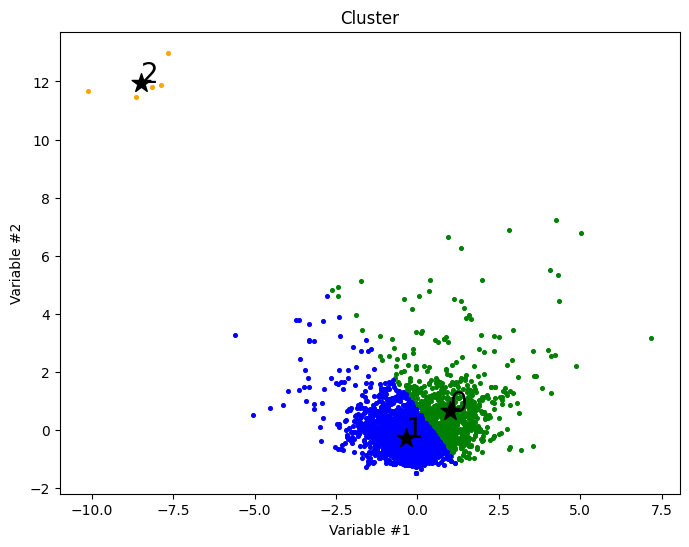

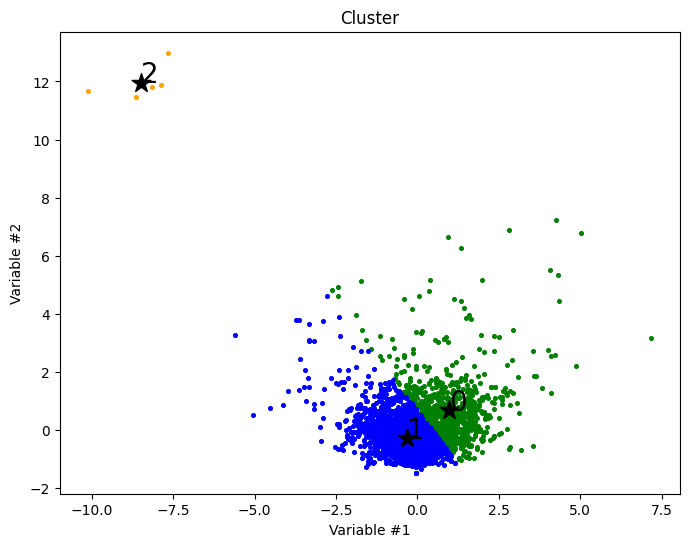

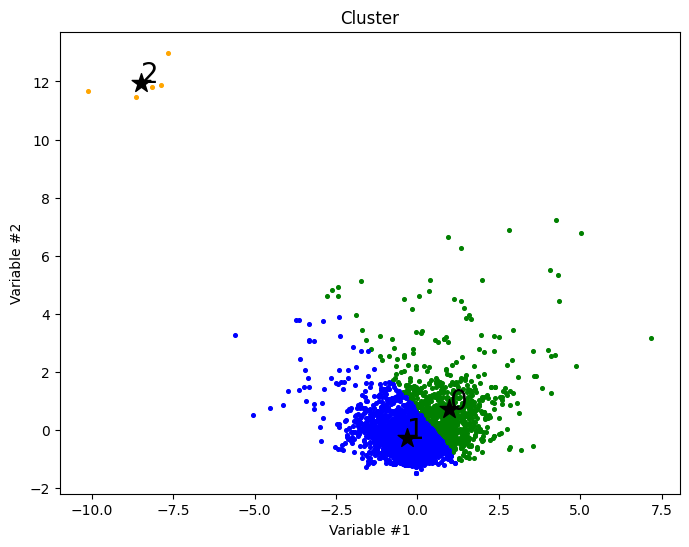

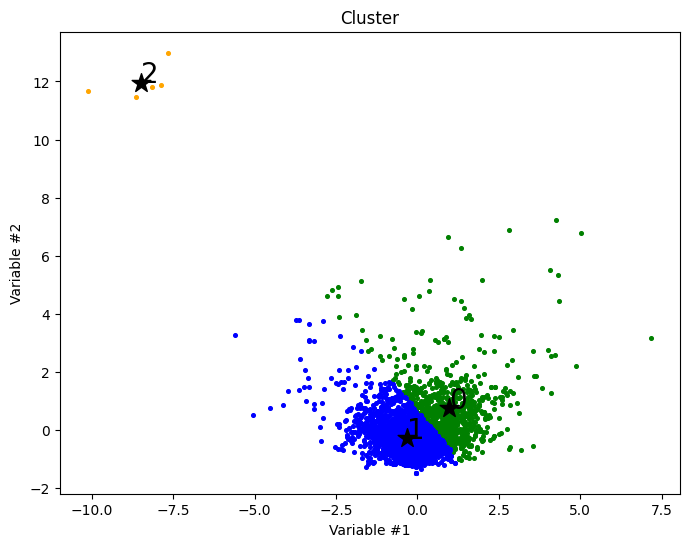

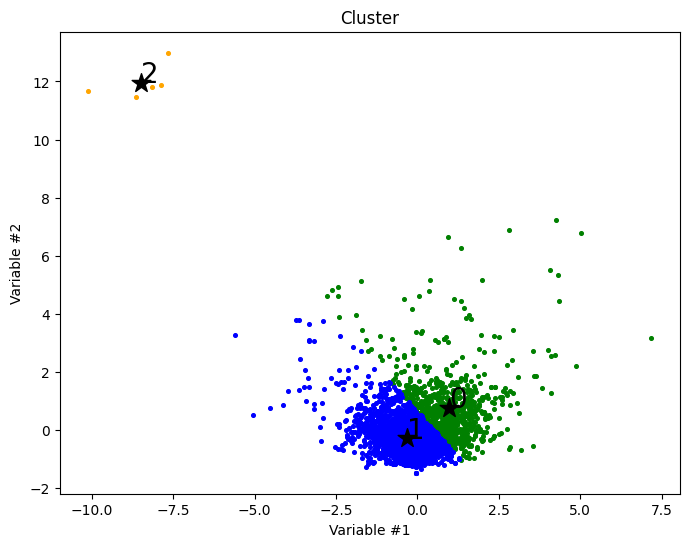

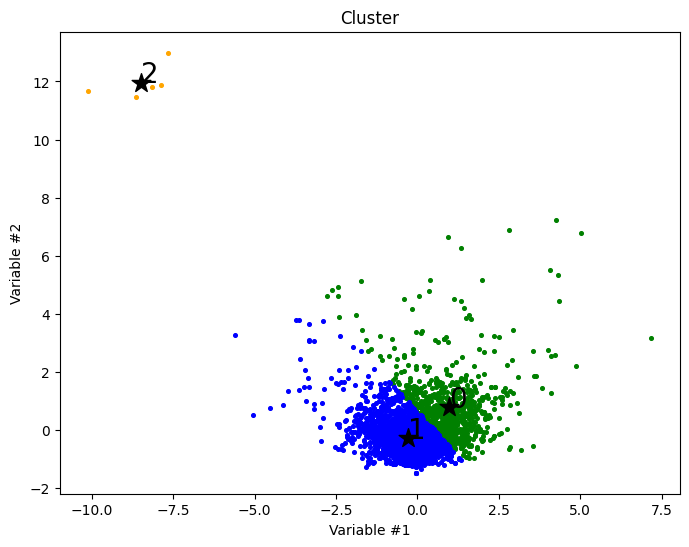

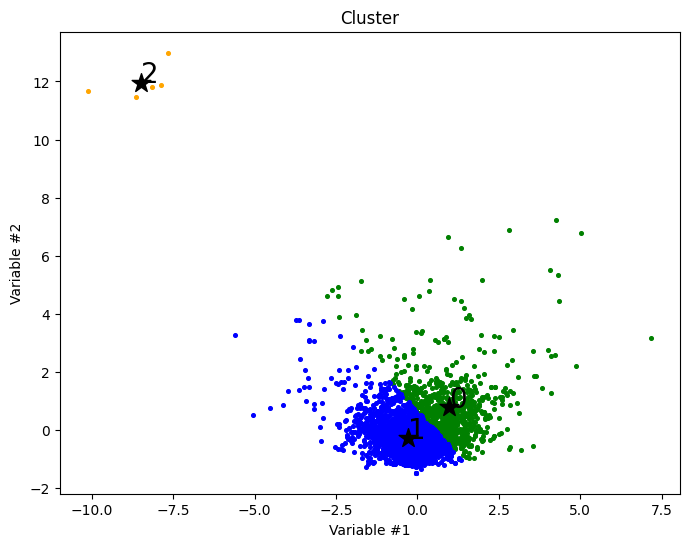

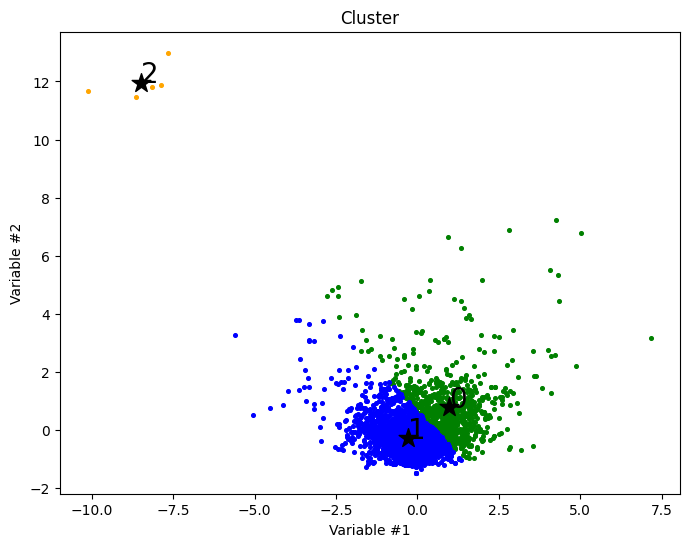

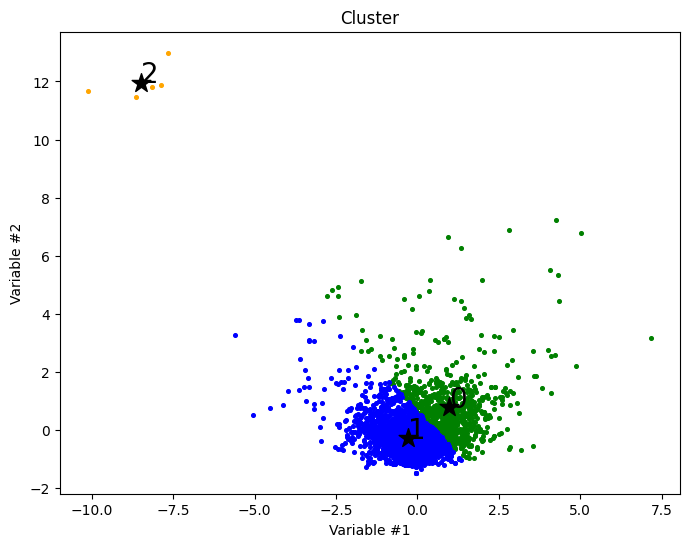

In [112]:
# call a function
K = 3
label_kmean = kmeanClustering(X_norm, K)

In [113]:
label_kmean

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

### Use label from KMean

In [114]:
stock['Class'] = label_kmean 
stock.head(10)

,Open,High,Low,Close,Adj Close,Volume,Log Rets,Rets Mean,Rets STD,Class
Date,,,,,,,,,,
2010-01-11,24.799999,25.100000,24.799999,24.900000,14.156686,63098000,0.012121,0.003239,0.007268,1.0
2010-01-12,24.799999,24.900000,24.700001,24.700001,14.042977,36750000,-0.008065,0.002444,0.008399,1.0
2010-01-13,24.500000,24.799999,24.400000,24.600000,13.986125,62833000,-0.004057,0.000815,0.008782,1.0
2010-01-14,24.799999,24.900000,24.600000,24.700001,14.042977,32838000,0.004057,0.002444,0.008391,1.0
2010-01-15,24.799999,24.900000,24.600000,24.700001,14.042977,35461000,0.000000,0.000811,0.007771,1.0
2010-01-18,24.600000,24.700001,24.500000,24.700001,14.042977,23203000,0.000000,-0.001613,0.004608,1.0
2010-01-19,24.600000,24.700001,24.200001,24.200001,13.758703,46709000,-0.020451,-0.004090,0.009585,1.0
2010-01-20,24.299999,24.299999,23.500000,23.799999,13.531285,50895000,-0.016667,-0.006612,0.011112,1.0
2010-01-21,23.600000,23.700001,23.100000,23.100000,13.133309,72969000,-0.029853,-0.013394,0.013136,1.0


In [115]:
# idea to trade

idx_c0 = np.where(stock['Class'] == 0) # find index in class 0
idx_c0

(array([  17,   18,   29,   30,   31,   32,   33,   34,   35,   36,   37,
          38,   39,   45,   46,   47,   48,   49,   50,   51,   52,   56,
          57,   58,   59,   60,   61,   62,   66,   67,   68,   69,   70,
          74,   75,   76,   77,   78,   79,   92,   93,   94,   95,   96,
         107,  108,  131,  132,  133,  134,  135,  146,  147,  148,  155,
         156,  157,  158,  159,  160,  161,  162,  170,  173,  186,  199,
         200,  201,  202,  203,  204,  219,  220,  221,  222,  223,  224,
         239,  240,  241,  242,  246,  247,  248,  249,  250,  251,  252,
         253,  255,  256,  257,  258,  259,  260,  271,  272,  284,  285,
         286,  287,  302,  303,  304,  305,  306,  308,  310,  323,  324,
         325,  356,  357,  358,  359,  360,  361,  362,  386,  387,  388,
         389,  390,  396,  397,  398,  399,  400,  417,  424,  425,  426,
         427,  428,  429,  430,  431,  432,  433,  434,  435,  436,  437,
         438,  439,  440,  441,  442, 

In [116]:
len(idx_c0)

1

In [117]:
len(idx_c0[0])

832

In [118]:
idx_c1 = np.where(stock['Class'] == 1)
idx_c1

(array([   0,    1,    2, ..., 3402, 3403, 3404]),)

In [119]:
len(idx_c1[0])

2568

In [120]:
idx_c2 = np.where(stock['Class'] == 2)
idx_c2

(array([2483, 2484, 2485, 2486, 2487]),)

In [121]:
len(idx_c2[0])

5

In [122]:
len(stock), len(idx_c0[0]) + len(idx_c1[0]) + len(idx_c2[0])

(3405, 3405)

In [123]:
# if we would like to trade only some class

profit_c0 = stock['Log Rets']
profit_c0

Date
2010-01-11    0.012121
2010-01-12   -0.008065
2010-01-13   -0.004057
2010-01-14    0.004057
2010-01-15    0.000000
                ...   
2023-12-22    0.007117
2023-12-25    0.007067
2023-12-26    0.007018
2023-12-27    0.000000
2023-12-28    0.000000
Name: Log Rets, Length: 3405, dtype: float64

In [124]:
type(profit_c0)

pandas.core.series.Series

In [125]:
profit_c0 = np.array(profit_c0).reshape(-1, 1)
profit_c0

array([[ 0.01212124],
       [-0.00806457],
       [-0.00405667],
       ...,
       [ 0.00701757],
       [ 0.        ],
       [ 0.        ]])

In [126]:
profit_c0[idx_c1, 0] = 0
profit_c0[idx_c2, 0] = 0
profit_c0

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

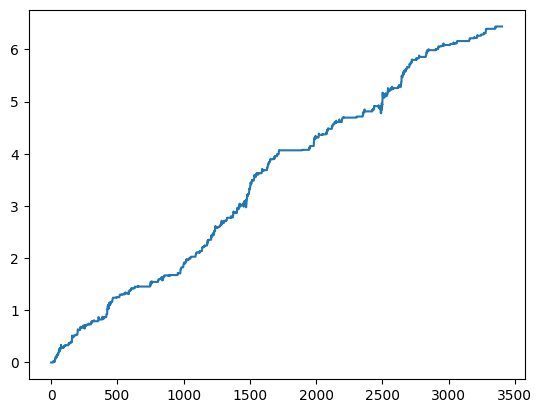

In [127]:
plt.plot(profit_c0.cumsum())

In [128]:
profit_c1 = np.array(stock['Log Rets']).reshape(-1, 1)
profit_c1

array([[ 0.01212124],
       [-0.00806457],
       [-0.00405667],
       ...,
       [ 0.00701757],
       [ 0.        ],
       [ 0.        ]])

In [129]:
profit_c1[idx_c0, 0] = 0
profit_c1[idx_c2, 0] = 0
profit_c1

array([[ 0.01212124],
       [-0.00806457],
       [-0.00405667],
       ...,
       [ 0.00701757],
       [ 0.        ],
       [ 0.        ]])

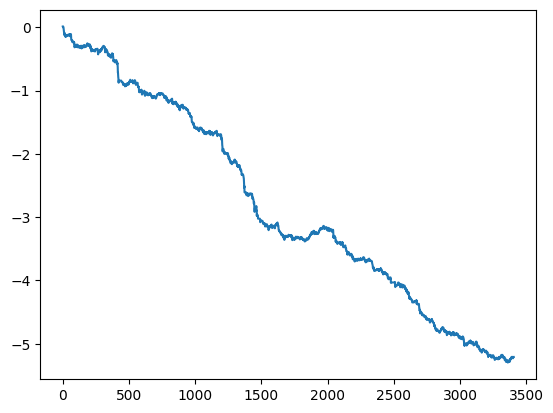

In [130]:
plt.plot(profit_c1.cumsum())

In [131]:
profit_c2 = np.array(stock['Log Rets']).reshape(-1, 1)
profit_c2

array([[ 0.01212124],
       [-0.00806457],
       [-0.00405667],
       ...,
       [ 0.00701757],
       [ 0.        ],
       [ 0.        ]])

In [132]:
profit_c2[idx_c0, 0] = 0
profit_c2[idx_c1, 0] = 0
profit_c2

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

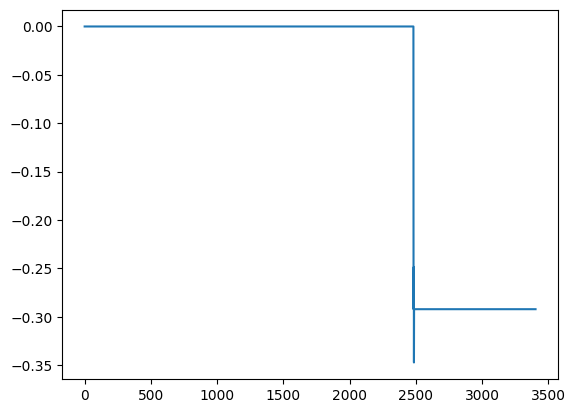

In [133]:
plt.plot(profit_c2.cumsum())

*** Require to select the correct class and time before trade
- What we require to do more
    - Lock ahead bias
    - In sample & Out sample

In [134]:
stock.head()

,Open,High,Low,Close,Adj Close,Volume,Log Rets,Rets Mean,Rets STD,Class
Date,,,,,,,,,,
2010-01-11,24.799999,25.100000,24.799999,24.900000,14.156686,63098000,0.012121,0.003239,0.007268,1.0
2010-01-12,24.799999,24.900000,24.700001,24.700001,14.042977,36750000,-0.008065,0.002444,0.008399,1.0
2010-01-13,24.500000,24.799999,24.400000,24.600000,13.986125,62833000,-0.004057,0.000815,0.008782,1.0
2010-01-14,24.799999,24.900000,24.600000,24.700001,14.042977,32838000,0.004057,0.002444,0.008391,1.0
2010-01-15,24.799999,24.900000,24.600000,24.700001,14.042977,35461000,0.000000,0.000811,0.007771,1.0
